# Eksploracja zbioru danych Agriculture Crop Yield

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Wczytanie surowych danych

In [5]:
file_path = '../data/raw/crop_yield.csv'
df = pd.read_csv(file_path)

## 2. Wypisanie podstawowych informacji ze zbioru

### 2.1. Wypisanie wartości początkowych zbioru danych:

In [10]:
head = df.head()
print(head)

  Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
0   West     Sandy   Cotton   897.077239            27.676966   
1  South      Clay     Rice   992.673282            18.026142   
2  North      Loam   Barley   147.998025            29.794042   
3  North     Sandy  Soybean   986.866331            16.644190   
4  South      Silt    Wheat   730.379174            31.620687   

   Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
0            False             True            Cloudy              122   
1             True             True             Rainy              140   
2            False            False             Sunny              106   
3            False             True             Rainy              146   
4             True             True            Cloudy              110   

   Yield_tons_per_hectare  
0                6.555816  
1                8.527341  
2                1.127443  
3                6.517573  
4                7.24825

### 2.2. Opis zbioru danych z wykorzystaniem funkcji describe():

In [11]:
description = df.describe(include='all')
print(description)

         Region Soil_Type     Crop     Rainfall_mm  Temperature_Celsius  \
count   1000000   1000000  1000000  1000000.000000       1000000.000000   
unique        4         6        6             NaN                  NaN   
top       North     Sandy    Maize             NaN                  NaN   
freq     250173    167119   166824             NaN                  NaN   
mean        NaN       NaN      NaN      549.981901            27.504965   
std         NaN       NaN      NaN      259.851320             7.220608   
min         NaN       NaN      NaN      100.000896            15.000034   
25%         NaN       NaN      NaN      324.891090            21.254502   
50%         NaN       NaN      NaN      550.124061            27.507365   
75%         NaN       NaN      NaN      774.738520            33.753267   
max         NaN       NaN      NaN      999.998098            39.999997   

       Fertilizer_Used Irrigation_Used Weather_Condition  Days_to_Harvest  \
count          1000000

### 2.3. Sprawdzenie czy występują puste wartości w zbiorze danych:

In [12]:
missing_values = df.isnull().sum()
print(missing_values)

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64


### 2.4. Opracowanie macierzy korelacji:

In [13]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

                        Rainfall_mm  Temperature_Celsius  Fertilizer_Used  \
Rainfall_mm                1.000000            -0.000123        -0.001076   
Temperature_Celsius       -0.000123             1.000000         0.002343   
Fertilizer_Used           -0.001076             0.002343         1.000000   
Irrigation_Used           -0.000568            -0.000484         0.001510   
Days_to_Harvest           -0.002669            -0.000731        -0.001029   
Yield_tons_per_hectare     0.764618             0.085565         0.442099   

                        Irrigation_Used  Days_to_Harvest  \
Rainfall_mm                   -0.000568        -0.002669   
Temperature_Celsius           -0.000484        -0.000731   
Fertilizer_Used                0.001510        -0.001029   
Irrigation_Used                1.000000        -0.001234   
Days_to_Harvest               -0.001234         1.000000   
Yield_tons_per_hectare         0.353741        -0.002591   

                        Yield_tons_per_

## 3. Wykresy

### 3.1. Wykres rozkładu plonów:

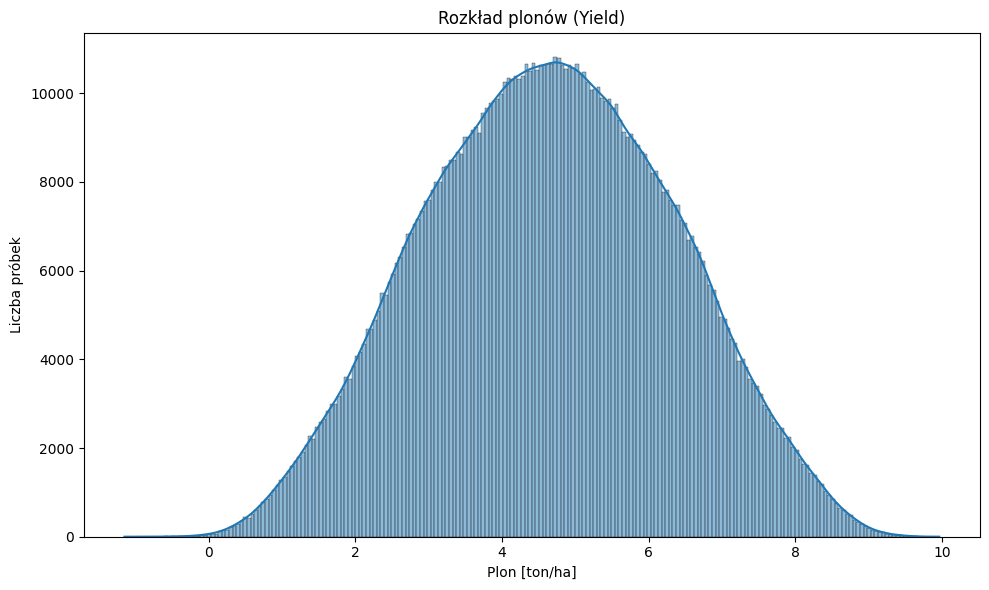

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Yield_tons_per_hectare'], kde=True)
plt.title('Rozkład plonów (Yield)')
plt.xlabel('Plon [ton/ha]')
plt.ylabel('Liczba próbek')
plt.tight_layout()
plt.savefig('../outputs/figures/yield_distribution.png')

### 3.2. Graficzna reprezentacja macierzy korelacji cech numerycznych:

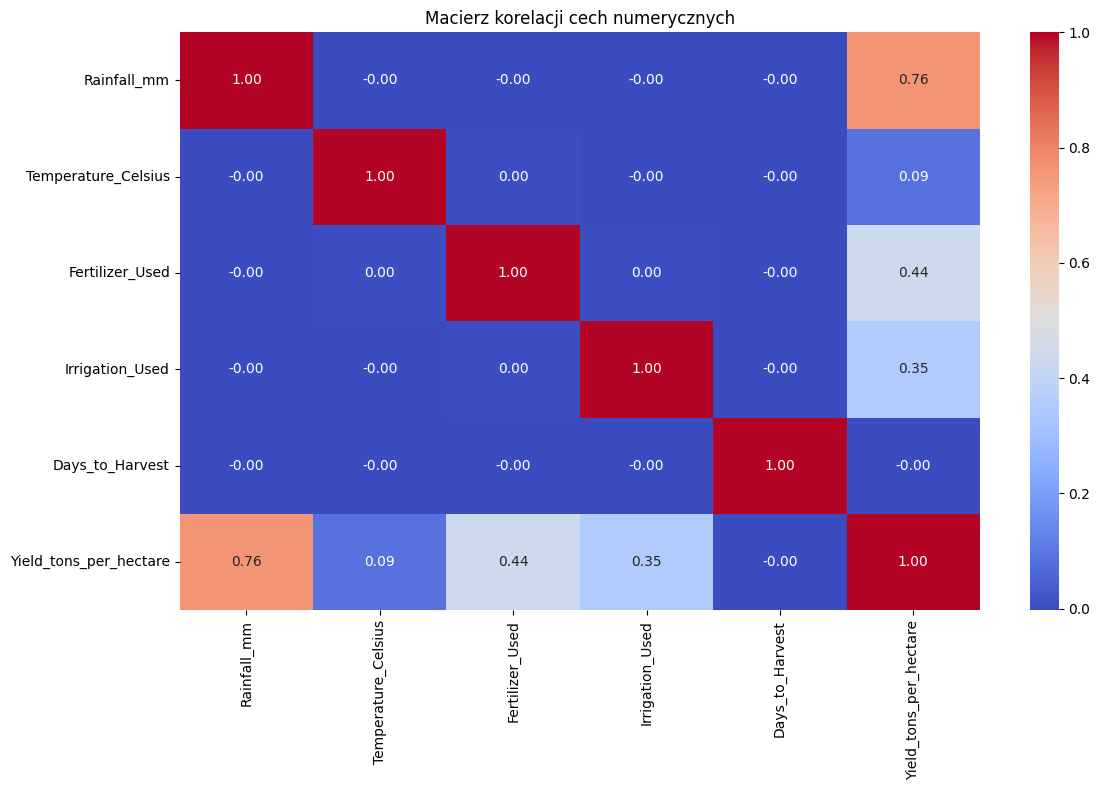

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji cech numerycznych')
plt.tight_layout()
plt.savefig('../outputs/figures/correlation_heatmap.png')